In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def generate_Training_batch(trueW=[2,3],shape=(10,2)):
    Xtrain = np.random.random(shape)
    W = np.array(trueW).reshape(-1,1)
    ytrain = np.dot(Xtrain,np.array(W))
    return Xtrain, ytrain
Xtrain,ytrain = generate_Training_batch()

Xtrain.shape,ytrain.shape

((10, 2), (10, 1))

# Regression
Hier benutzen wir ein einfaches Regressionsmodell $y=W\cdot x+ b$ und minimieren einen mean squared error.

Placeholder werden später durch Datenarrays ersetzt (siehe sess.run-Befehl weiter unten):

In [3]:
X=tf.placeholder(tf.float32,shape=[None,2])
y=tf.placeholder(tf.float32,shape=[None,1])

Variablen wie $W$ und $b$ hingegen werden initialisiert (hier mit Null) und durch einen Optimizer (GradientDescentOptimizer) verändert.

In [4]:
W=tf.Variable(tf.zeros((2,1)),dtype=tf.float32,name="W")
b=tf.Variable(tf.zeros((1)),dtype=tf.float32,name="b")

Nun müssen wir das Modell und die Verlustfunktion (loss) definieren: 

In [5]:
yhat=tf.matmul(X,W)+b

In [6]:
loss=tf.reduce_mean((y-yhat)**2)
#err=tf.reduce_sum((y-yhat)**2)

Die Tensorflow-Variablen müssen initialisiert werden. Dazu wird eine Initialisierungs-Op benötigt:

In [7]:
tf.global_variables_initializer?
#tf.variables_initializer?

In [8]:
tf.global_variables?
#tf.local_variables?

In [9]:
init = tf.global_variables_initializer()

Nun brauchen wir noch eine Session, in welcher alle Berechnungen ablaufen. Dieser müssen die Inputwerte (z.B. via feed_dict) übergeben werden. Eine Möglichkeit ist eine interaktive Session: 

In [10]:
tf.InteractiveSession?

In [23]:
sess = tf.InteractiveSession()
init.run()

In [12]:
#loss ist ein Tensor
loss.eval?

In [13]:
#init ist eine op
init.run?

In [14]:
Xtrain

array([[ 0.85533563,  0.56291086],
       [ 0.20440993,  0.33036985],
       [ 0.53244808,  0.36091553],
       [ 0.10362395,  0.09465645],
       [ 0.03431806,  0.64931145],
       [ 0.9806552 ,  0.76494539],
       [ 0.34154019,  0.36564428],
       [ 0.33925788,  0.63583831],
       [ 0.14438342,  0.51397716],
       [ 0.93680583,  0.98712439]])

In [24]:
loss.eval(feed_dict={X:Xtrain,y:ytrain})

7.7135286

In [25]:
#derzeit sind alle Parameterwerte auf Null gesetzt, d.h. W=0, b=0. loss ist daher das selbe wie
(ytrain**2).mean()

7.7135289107396376

Wir wollen aber optimieren, und dafür gibt es spezielle Ops:

In [26]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

Die nächsten zwei Zeilen können nun abwechselnd ausgeführt werden. Die train_step-op führt dabei jeweils einen Schritt im Gradientenabstieg durch:

In [33]:
train_step.run(feed_dict={X:Xtrain,y:ytrain})

In [34]:
W.eval(),b.eval()

(array([[ 0.11450863],
        [ 0.12086271]], dtype=float32), array([ 0.18860185], dtype=float32))

In [35]:
sess.close()

Nun iterieren wir in einer Schleife. Die Interaktive Session brauchen wir nicht mehr, sondern benutzen lieber eine with-Umgebung. Diese schliesst für uns automatisch am Ende die Session. 

In [52]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        res = sess.run([train_step],feed_dict={X:Xtrain,y:ytrain})

**Aufgabe**: Erweitern Sie diesen Code so, dass Sie eine Lernkurve für Trainings- und Testdaten erstellen können.

In [38]:
Xtest,ytest = generate_Training_batch()

In [42]:
init = tf.global_variables_initializer()
trainlosses=[]
testlosses=[]

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        trainloss,res_train_step = sess.run([loss,train_step],feed_dict={X:Xtrain,y:ytrain})
        testloss = sess.run([loss],feed_dict={X:Xtest,y:ytest})
        if i%200==0:
            print(trainloss)
        trainlosses.append(trainloss)
        testlosses.append(testloss)

7.71353
0.311156
0.159854
0.0884969
0.0534422


[[6.6865287],
 [6.3220186],
 [5.9798632],
 [5.6587019],
 [5.3572564],
 [5.0743279],
 [4.8087854],
 [4.5595717],
 [4.3256893],
 [4.1062036],
 [3.9002354],
 [3.7069592],
 [3.5255997],
 [3.3554273],
 [3.1957579],
 [3.045948],
 [2.9053941],
 [2.7735283],
 [2.6498177],
 [2.533762],
 [2.4248903],
 [2.3227611],
 [2.2269592],
 [2.1370955],
 [2.0528038],
 [1.9737402],
 [1.8995819],
 [1.830026],
 [1.7647873],
 [1.703599],
 [1.6462101],
 [1.5923845],
 [1.541901],
 [1.494552],
 [1.4501421],
 [1.4084882],
 [1.3694185],
 [1.3327713],
 [1.2983954],
 [1.2661481],
 [1.2358961],
 [1.207514],
 [1.1808844],
 [1.1558967],
 [1.1324474],
 [1.1104391],
 [1.0897804],
 [1.0703863],
 [1.0521762],
 [1.0350748],
 [1.0190113],
 [1.0039194],
 [0.98973691],
 [0.97640544],
 [0.96387064],
 [0.95208073],
 [0.94098777],
 [0.93054688],
 [0.92071551],
 [0.91145408],
 [0.90272522],
 [0.89449483],
 [0.88672942],
 [0.8793987],
 [0.87247407],
 [0.86592901],
 [0.85973758],
 [0.85387689],
 [0.84832448],
 [0.84305984],
 [0.838063

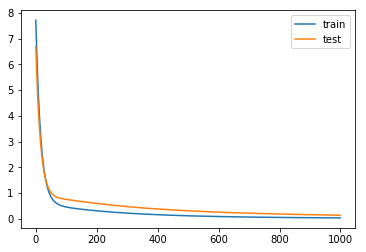

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(trainlosses,label='train')
plt.plot(testlosses,label='test')
plt.legend()

# Klassifikation

Bearbeiten Sie das Tutorial
https://www.tensorflow.org/get_started/mnist/pros
Kopieren Sie die einzelnen beschriebenen Code-Zeilen hier rein und vertiefen Sie Ihr Verständnis dessen, was dieser Code macht.